In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df1 = pd.read_csv('data/AML_protein_mRNA_correlations.csv')
thresh = 0.33
df1['Significant'] = 'No'
df1.loc[np.absolute(df1.Spearman_Correlation)>=thresh, 'Significant'] = 'Yes'
df1

,Protein_Gene,Spearman_Correlation,Significant
0,A1BG,-0.16,No
1,A2M,0.28,No
2,AAAS,-0.10,No
3,AACS,0.15,No
4,AADAT,0.80,Yes
...,...,...,...
10120,ZXDC,0.15,No
10121,ZYG11B,0.25,No
10122,ZYX,0.70,Yes
10123,ZZEF1,0.12,No


In [17]:
df2 = df1.groupby('Significant')['Protein_Gene'].agg(['size'])
df2

,size
Significant,
No,5061
Yes,5064


In [21]:
pct_sig = df2.loc[df2.index=='Yes', 'size']/df1.shape[0]
pct_sig

Significant
Yes    0.500148
Name: size, dtype: float64

In [43]:
pct_sig.Yes

0.5001481481481481

Text(0.4, 150, '50.0%')

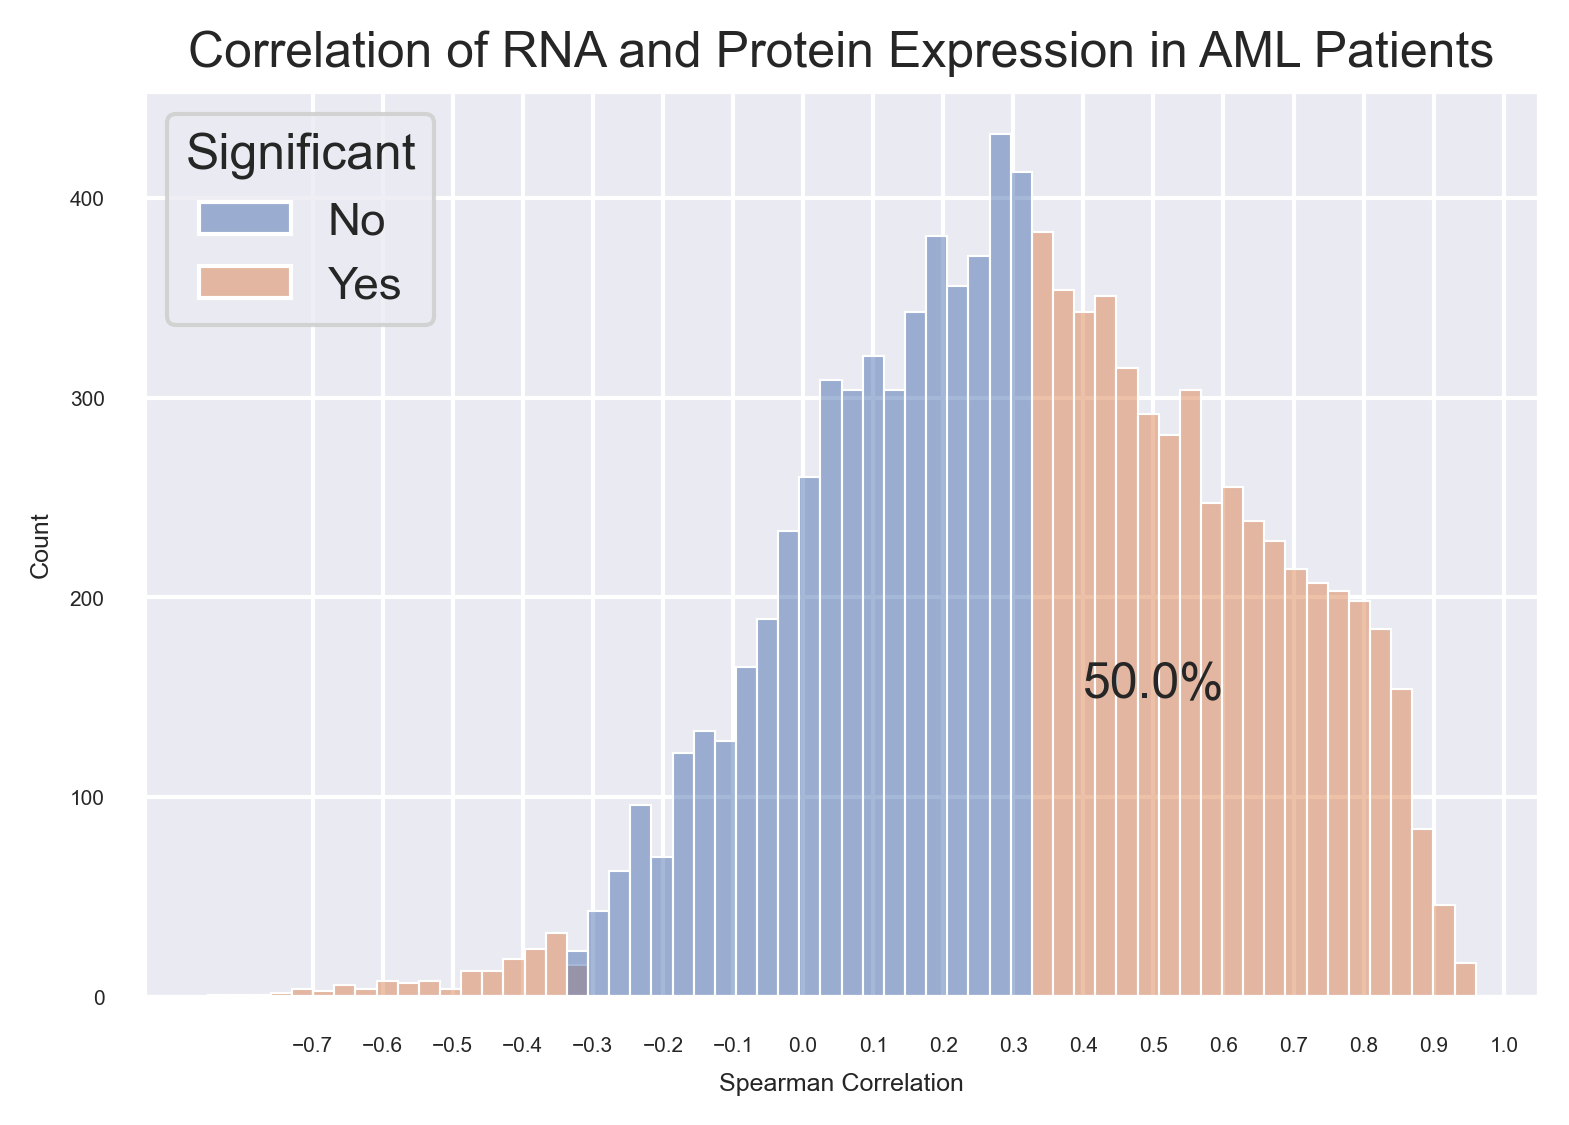

In [46]:
plt.figure(dpi=300)
sns.histplot(data=df1, bins=60,
             x='Spearman_Correlation', 
             hue='Significant')
plt.title("Correlation of RNA and Protein Expression in AML Patients")
plt.xlabel("Spearman Correlation", fontsize=6)  
plt.ylabel("Count", fontsize=6)
plt.xticks(fontsize=5) 
plt.yticks(fontsize=5)
ax = plt.subplot(111)  
ax.xaxis.set_ticks(np.linspace(-0.7, 1, 18, endpoint=True))
sns.move_legend(ax, "upper left")
plt.text(0.4, 150, f'{round(pct_sig.Yes, 3)*100}%')

In [47]:
# plt.figure(dpi=300)

# N, bins, patches = plt.hist(df1['Spearman_Correlation'], 60)

# # cmap = plt.get_cmap('jet')
# # low = cmap(0.1)
# # medium =cmap(0.9)
# # high = cmap(0.1)
# # for i in range(np.min(df1['Spearman_Correlation']), -thresh):
# #     patches[i].set_facecolor(low)
# # for i in range(-thresh, thresh):
# #     patches[i].set_facecolor(medium)
# # for i in range(thresh, np.max(df1['Spearman_Correlation'])):
# #     patches[i].set_facecolor(high)
    
# for c, p in zip(bins, patches):
#     if c <= -thresh:
#         plt.setp(p, 'facecolor', 'green')
#     elif c > -thresh and c < thresh:
#         plt.setp(p, 'facecolor', 'red')
#     elif c >= thresh:
#         plt.setp(p, 'facecolor', 'green')

# plt.title("Correlation of RNA and Protein Expression in AML Patients")
# plt.xlabel("Spearman Correlation", fontsize=6)  
# plt.ylabel("Count", fontsize=6)
# plt.xticks(fontsize=5) 
# plt.yticks(fontsize=5)
# ax = plt.subplot(111)  
# # ax.spines["top"].set_visible(False)  
# # ax.spines["right"].set_visible(False)
# ax.xaxis.set_ticks(np.linspace(-0.7, 1, 18, endpoint=True))
# # ax.grid = False


# plt.legend(loc="upper left")

# plt.show()